## 重要参数n_components

### 高维数据可视化

In [1]:
# 调用库和模块
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [4]:
# 提取数据集
iris = load_iris()
X = iris.data
y = iris.target

In [15]:
X.shape

(150, 4)

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
import pandas as pd
pd.DataFrame(X)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
# 建模
pca = PCA(n_components=2)
pca = pca.fit(X)
X_dr = pca.transform(X)

In [17]:
X_dr.shape

(150, 2)

In [19]:
# 可视化

X_dr[y==0, 0]

array([-2.68412563, -2.71414169, -2.88899057, -2.74534286, -2.72871654,
       -2.28085963, -2.82053775, -2.62614497, -2.88638273, -2.6727558 ,
       -2.50694709, -2.61275523, -2.78610927, -3.22380374, -2.64475039,
       -2.38603903, -2.62352788, -2.64829671, -2.19982032, -2.5879864 ,
       -2.31025622, -2.54370523, -3.21593942, -2.30273318, -2.35575405,
       -2.50666891, -2.46882007, -2.56231991, -2.63953472, -2.63198939,
       -2.58739848, -2.4099325 , -2.64886233, -2.59873675, -2.63692688,
       -2.86624165, -2.62523805, -2.80068412, -2.98050204, -2.59000631,
       -2.77010243, -2.84936871, -2.99740655, -2.40561449, -2.20948924,
       -2.71445143, -2.53814826, -2.83946217, -2.54308575, -2.70335978])

In [13]:
colors = ['red', 'black', 'orange']
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

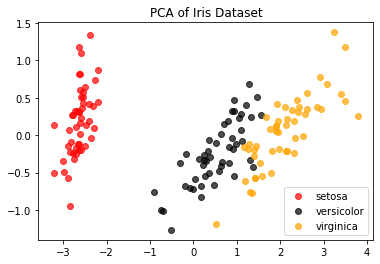

In [14]:
plt.figure()

for i in [0,1,2]:
    plt.scatter(X_dr[y==i, 0], X_dr[y==i,1],alpha=.7, c=colors[i],label=iris.target_names[i])
    
plt.legend()
plt.title('PCA of Iris Dataset')
plt.show()

In [20]:
# 探索降维后的数据
# 属性explained_variance_，查看降维后每个新特征向量上所带的信息量大小（可解释性方差的大小）
pca.explained_variance_

array([4.22824171, 0.24267075])

In [21]:
# 查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比,
# 又叫可解释性方差贡献率
pca.explained_variance_ratio_
# 大部分信息都被有效的集中在了第一个特征上

array([0.92461872, 0.05306648])

In [22]:
pca.explained_variance_ratio_.sum()

0.9776852063187949

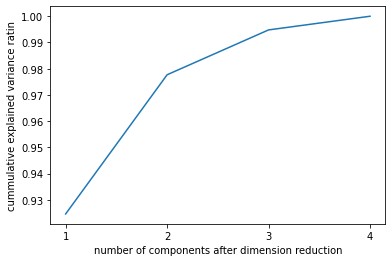

In [24]:
# 选择最好的n_components:累计可解释性方差贡献率曲线

import numpy as np
pca_line = PCA().fit(X)
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4])
plt.xlabel('number of components after dimension reduction')
plt.ylabel('cummulative explained variance ratin')
plt.show()

### 最大似估计自选超参数

In [25]:
pca_mle = PCA(n_components='mle')
X_mle = pca_mle.fit_transform(X)
X_mle

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [27]:
pca_mle.explained_variance_ratio_.sum()

0.9947878161267246

### 按信息量占比选超参数

In [32]:
pca_f = PCA(n_components=0.97, svd_solver='full')
X_f = pca_f.fit_transform(X)
pca_f.explained_variance_ratio_.sum()

0.9776852063187949

In [33]:
X_f

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

## PCA中的SVD

### PCA中的SVD哪里来？

In [36]:
PCA(2).fit(X).components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [37]:
PCA(2).fit(X).components_.shape

(2, 4)

### 重要属性components_

In [1]:
# 导入需要的库和模块

from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 实例化数据集，探索数据
faces = fetch_lfw_people(min_faces_per_person=60)

In [ ]:
faces.data.shape